In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt_disc
import matplotlib.pyplot as plt_orig
from xgboost import XGBRegressor

In [2]:
# Importing Dataset
df = pd.read_csv('Position_Salaries.csv')

In [3]:
# Data
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
# Data shape
df.shape

(10, 3)

In [5]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
# Features and Class
X = df.iloc[:, 1:-1]
y = df.iloc[:, 2:]

In [7]:
# eXtreme Gradient Boosting Regression
xg_bst_reg = XGBRegressor(n_estimators=1000, learning_rate=0.01, criterion='friedman_mse', n_jobs=-1)
xg_bst_reg.fit(X, y)

[13:43:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, criterion='friedman_mse',
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

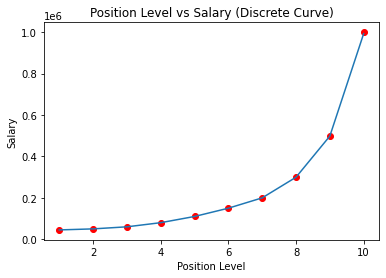

In [8]:
# Visualizing eXtreme Gradient Boosting Regression Results
plt_disc.scatter(X, y, color='red', label='Scatter Plot')
plt_disc.plot(X, xg_bst_reg.predict(X), label='Regression Line')
plt_disc.title('Position Level vs Salary (Discrete Curve)')
plt_disc.xlabel('Position Level')
plt_disc.ylabel('Salary')
plt_disc.show()

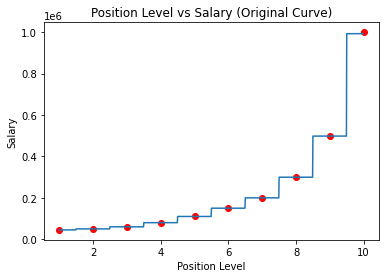

In [9]:
# Visualizing eXtreme Gradient Boosting Regression Results (Original)
X_grid = np.arange(min(X.values), max(X.values), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt_orig.scatter(X, y, color='red', label='Scatter Plot')
plt_orig.plot(X_grid, xg_bst_reg.predict(X_grid), label='Regression Line')
plt_orig.title('Position Level vs Salary (Original Curve)')
plt_orig.xlabel('Position Level')
plt_orig.ylabel('Salary')
plt_orig.show()